## Data Exploration

In [1]:
#importing necessary imports

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from surprise import Dataset, Reader, accuracy
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
from surprise.prediction_algorithms import SVD, SVDpp, NMF, BaselineOnly, NormalPredictor

%matplotlib inline

## Exploring Review Data

In [3]:
#reading in our data as a dataframe

In [4]:
df = pd.read_json("Data/reviews_Beauty_5.json.gz",lines=True)

In [5]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1391040000,"01 30, 2014"
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3,OK Palette!,1397779200,"04 18, 2014"
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4,great quality,1378425600,"09 6, 2013"
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2,Do not work on my face,1386460800,"12 8, 2013"
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3,It's okay.,1382140800,"10 19, 2013"
...,...,...,...,...,...,...,...,...,...
198497,A2BLFCOPSMBOZ9,B00LLPT4HI,Dave Edmiston,"[0, 0]",Just a little dab of this shea butter should b...,5,A little dab...,1405468800,"07 16, 2014"
198498,A1UQBFCERIP7VJ,B00LLPT4HI,Margaret Picky,"[0, 0]",This shea butter is completely raw and unrefin...,5,Pure organic raw shea butter,1405296000,"07 14, 2014"
198499,A35Q0RBM3YNQNF,B00LLPT4HI,M. Hill,"[0, 0]",The skin is the body's largest organ and it ab...,5,One Pound Organic Grade A Unrefined Shea Butter,1405468800,"07 16, 2014"
198500,A3LGT6UZL99IW1,B00LLPT4HI,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]",I have very dry elbows and knees. I have a to...,5,This stuff is amazing!,1405382400,"07 15, 2014"


In [6]:
#checking for nulls

In [7]:
df.isna().sum()

reviewerID           0
asin                 0
reviewerName      1386
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [8]:
#1386 reviewerNames left blank; we will not need reviewerName since utilizing reviewerID
#checking that all needed information is provided when reviewerName is NaN

In [9]:
df[df['reviewerName'].isnull()]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
8,A3LMILRM9OC3SA,9759091062,NaN,"[0, 0]",Did nothing for me. Stings when I put it on. I...,2,"no Lightening, no Brightening,......NOTHING",1405209600,"07 13, 2014"
1790,AK1H26O8DLMNN,B0000535UM,NaN,"[0, 0]",The first thickening shampoo that works on my ...,5,Actually works,1405123200,"07 12, 2014"
2242,APTLHR9PHGPXN,B00005NAOD,NaN,"[0, 0]","Kind of drying, not moisturizing. Kind of disa...",2,Inexpensive and feels that wY,1405209600,"07 13, 2014"
2304,AQWX644AFUFFK,B00005NFBD,NaN,"[0, 0]","This is just ok. For one, I found this in a st...",3,"Ok, nothing amazing",1405468800,"07 16, 2014"
3651,A43K5ZRQ87TO6,B00008PC1O,NaN,"[0, 0]",Works well and easy to use!,5,Five Stars,1405296000,"07 14, 2014"
...,...,...,...,...,...,...,...,...,...
197192,A1Z3AV93ONK5VF,B00KAL5JAU,NaN,"[0, 0]",We already had the Dead Sea Shampoo by Adovia ...,5,"Non greasy, silky shiny hair",1401235200,"05 28, 2014"
197193,A184I8GT3BHZQV,B00KAL5JAU,NaN,"[0, 1]",&#60;a href=&#34;http://www.tomoson.com/?code=...,5,Dead Sea Salt hair conditioner,1403568000,"06 24, 2014"
197194,A8C9EJORQD23,B00KAL5JAU,NaN,"[0, 1]",I use this with the Adovia shampoo I mention a...,5,Adovia does natural right!,1402272000,"06 9, 2014"
198446,A2PIGZCDGM4NJ7,B00L5JHZJO,NaN,"[10, 11]","This is a horrible product, most of the review...",1,Bad Product,1404864000,"07 9, 2014"


In [10]:
#checking that all reviewers have completed at least 5 reviews

In [11]:
df.reviewerID.value_counts()

A2V5R832QCSOMX    204
ALNFHVS3SC4FV     192
AKMEY1BSHSDG7     182
A3KEZLJ59C1JVH    154
ALQGOMOY1F5X9     150
                 ... 
A1AHQWSMQ9RZYZ      5
A51EAGUKGTONU       5
A2E1E8QQC0EDUM      5
A1IA85M6GDJLA9      5
A204857VL764X7      5
Name: reviewerID, Length: 22363, dtype: int64

In [12]:
#YAY! all reviewerIDs have value of at least 5, total of 22,363 reviewers

In [13]:
#checking that all products have been reviewed at least 5 times

In [14]:
df.asin.value_counts()

B004OHQR1Q    431
B0043OYFKU    403
B0069FDR96    391
B000ZMBSPE    389
B00150LT40    329
             ... 
B000VOLJGO      5
B001FWXISS      5
B0028S0V1K      5
B006YFCHSS      5
B0042I19QU      5
Name: asin, Length: 12101, dtype: int64

In [15]:
#YAY! all products have at least 5 reviews, total of 12,101 different products

In [16]:
#looking at ratings distribution

In [17]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data = df['overall'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} reviews'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [18]:
#we see a majority of our ratings are 5s, which could impact our system

In [19]:
#exploring number of ratings per product

In [20]:
# Number of ratings per product
data = df.groupby('asin')['overall'].count().clip(upper=50)

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Product (Clipped at 100)',
                   xaxis = dict(title = 'Number of Ratings Per Product'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [21]:
#We see a majority of our projects have 10 or less ratings

In [22]:
#exploring ratings distribution by user

In [23]:
# Number of ratings per user
data = df.groupby('reviewerID')['overall'].count().clip(upper=50)

trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per User (Clipped at 50)',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [24]:
#we see most users rated under 10 products

In [25]:
lower_rating = df.overall.min()

In [26]:
upper_rating = df.overall.max()

In [27]:
#Confirming our review range is 1 to 5

In [28]:
print('Review range: {0} to {1}'.format(lower_rating, upper_rating))

Review range: 1 to 5


In [29]:
#Creating dataframe with appropriate columns to run through surprise

In [30]:
surprise_df = df[['reviewerID', 'asin', 'overall']]

In [31]:
surprise_df

,reviewerID,asin,overall
0,A1YJEY40YUW4SE,7806397051,1
1,A60XNB876KYML,7806397051,3
2,A3G6XNM240RMWA,7806397051,4
3,A1PQFP6SAJ6D80,7806397051,2
4,A38FVHZTNQ271F,7806397051,3
...,...,...,...
198497,A2BLFCOPSMBOZ9,B00LLPT4HI,5
198498,A1UQBFCERIP7VJ,B00LLPT4HI,5
198499,A35Q0RBM3YNQNF,B00LLPT4HI,5
198500,A3LGT6UZL99IW1,B00LLPT4HI,5


In [32]:
#Checking average rating user to see if there are users who rate everything 1 or 5

In [33]:
avg_rating_user = df.groupby("reviewerID")["overall","reviewerID"].mean().sort_values("overall")
avg_rating_user

<ipython-input-33-8752c1212ea2>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,overall
reviewerID,
A1W522Z24EPBJB,1.0
A2DPSPXFJ507C0,1.0
A1GQLVT0SWAWU,1.0
A1KLA02LZXAT46,1.0
A2MHHSACEJANSX,1.0
...,...
A15QGN6UXJVW9G,5.0
ANOJX4RAUJ9HL,5.0
A2RJT3IE2T6KXJ,5.0


In [34]:
low_rating_user = avg_rating_user[avg_rating_user["overall"]==1.0]
low_rating_user

,overall
reviewerID,
A1W522Z24EPBJB,1.0
A2DPSPXFJ507C0,1.0
A1GQLVT0SWAWU,1.0
A1KLA02LZXAT46,1.0
A2MHHSACEJANSX,1.0
A2RJTIE73NPN3C,1.0
ASWIC85F71H4J,1.0
A2TBE0N8JN6H4K,1.0
A1GPPMHYM6SMEW,1.0


In [35]:
#only 9 users have rated every product a 1

In [36]:
high_rating_user = avg_rating_user[avg_rating_user["overall"]==5.0]
high_rating_user

,overall
reviewerID,
A2FINIRQNXOTI,5.0
ATWS89FH6Y6S4,5.0
A16Q479PYT0G6N,5.0
A3OKW5VRXZG3OQ,5.0
A3O9Q3154FPZLL,5.0
...,...
A15QGN6UXJVW9G,5.0
ANOJX4RAUJ9HL,5.0
A2RJT3IE2T6KXJ,5.0


In [37]:
#2822 users have rated every product a 5

In [38]:
#we decide to keep these users in our final dataset but will not use them to test our model for recommendations

In [94]:
#elaborate on justification for keeping these reviews

## Exploring Meta Data

In [39]:
#Import our meta data 
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [40]:
meta_data_df = getDF("Data/meta_Beauty.json.gz")
meta_data_df

,asin,description,title,imUrl,salesRank,categories,price,related,brand
0,0205616461,"As we age, our once youthful, healthy skin suc...",Bio-Active Anti-Aging Serum (Firming Ultra-Hyd...,http://ecx.images-amazon.com/images/I/41DecrGO...,{'Health & Personal Care': 461765},"[[Beauty, Skin Care, Face, Creams & Moisturize...",NaN,NaN,NaN
1,0558925278,Mineral Powder Brush--Apply powder or mineral ...,Eco Friendly Ecotools Quality Natural Bamboo C...,http://ecx.images-amazon.com/images/I/51L%2BzY...,{'Beauty': 402875},"[[Beauty, Tools & Accessories, Makeup Brushes ...",NaN,NaN,NaN
2,0733001998,"From the Greek island of Chios, this Mastiha b...",Mastiha Body Lotion,http://ecx.images-amazon.com/images/I/311WK5y1...,{'Beauty': 540255},"[[Beauty, Skin Care, Body, Moisturizers, Lotio...",NaN,NaN,NaN
3,0737104473,Limited edition Hello Kitty Lipstick featuring...,Hello Kitty Lustre Lipstick (See sellers comme...,http://ecx.images-amazon.com/images/I/31u6Hrzk...,{'Beauty': 931125},"[[Beauty, Makeup, Lips, Lipstick]]",NaN,NaN,NaN
4,0762451459,"The mermaid is an elusive (okay, mythical) cre...",Stephanie Johnson Mermaid Round Snap Mirror,http://ecx.images-amazon.com/images/I/41y2%2BF...,NaN,"[[Beauty, Tools & Accessories, Mirrors, Makeup...",19.98,NaN,NaN
...,...,...,...,...,...,...,...,...,...
259199,B00LP2YB8E,Color: White\nFullness72 inches\nCenter Gather...,2t 2t Edge Crystal Rhinestones Bridal Wedding ...,http://ecx.images-amazon.com/images/I/41E630m-...,NaN,"[[Beauty, Hair Care, Styling Tools, Styling Ac...",NaN,NaN,NaN
259200,B00LOS7MEE,"The secret to long lasting colors, healthy nai...",French Manicure Gel Nail Polish Set - &quot;Se...,http://ecx.images-amazon.com/images/I/41skHL1O...,{'Beauty': 108820},"[[Beauty, Makeup, Nails, Nail Polish]]",NaN,"{'also_viewed': ['B0057JCYYE', 'B00LMXHR1Y', '...",NaN
259201,B00LPVG6V0,ResQ Organics Face & Body Wash - With Aloe Ver...,ResQ Organics Face &amp; Body Wash - Aloe Vera...,http://ecx.images-amazon.com/images/I/31C1w4Ku...,NaN,"[[Beauty, Skin Care, Face, Creams & Moisturize...",NaN,NaN,NaN
259202,B00LTDUHJQ,Color: White\n2 Tier \nFullness 72 inches\nSew...,2 Tier Tulle Elbow Wedding Veil with Ribbon Ed...,http://ecx.images-amazon.com/images/I/51%2B%2B...,NaN,"[[Beauty, Hair Care, Styling Tools, Styling Ac...",NaN,NaN,NaN


In [41]:
meta_data_df.head(100)

,asin,description,title,imUrl,salesRank,categories,price,related,brand
0,0205616461,"As we age, our once youthful, healthy skin suc...",Bio-Active Anti-Aging Serum (Firming Ultra-Hyd...,http://ecx.images-amazon.com/images/I/41DecrGO...,{'Health & Personal Care': 461765},"[[Beauty, Skin Care, Face, Creams & Moisturize...",NaN,NaN,NaN
1,0558925278,Mineral Powder Brush--Apply powder or mineral ...,Eco Friendly Ecotools Quality Natural Bamboo C...,http://ecx.images-amazon.com/images/I/51L%2BzY...,{'Beauty': 402875},"[[Beauty, Tools & Accessories, Makeup Brushes ...",NaN,NaN,NaN
2,0733001998,"From the Greek island of Chios, this Mastiha b...",Mastiha Body Lotion,http://ecx.images-amazon.com/images/I/311WK5y1...,{'Beauty': 540255},"[[Beauty, Skin Care, Body, Moisturizers, Lotio...",NaN,NaN,NaN
3,0737104473,Limited edition Hello Kitty Lipstick featuring...,Hello Kitty Lustre Lipstick (See sellers comme...,http://ecx.images-amazon.com/images/I/31u6Hrzk...,{'Beauty': 931125},"[[Beauty, Makeup, Lips, Lipstick]]",NaN,NaN,NaN
4,0762451459,"The mermaid is an elusive (okay, mythical) cre...",Stephanie Johnson Mermaid Round Snap Mirror,http://ecx.images-amazon.com/images/I/41y2%2BF...,NaN,"[[Beauty, Tools & Accessories, Mirrors, Makeup...",19.98,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,6041134473,Restore your skin's firmness and elasticity.\n...,Cellulite Massager Face Lift Face Massager 24k...,http://ecx.images-amazon.com/images/I/41Mv9hUf...,{'Beauty': 26646},"[[Beauty, Skin Care, Face]]",NaN,"{'also_bought': ['B00K7HKVQO', 'B00IODYRJ0', '...",NaN
96,6040652705,Cure time: 3 minutes. Performs with ease when ...,Atnails Nail Uv Gel - Extreme White - French M...,http://ecx.images-amazon.com/images/I/41EPV9ft...,{'Beauty': 554040},"[[Beauty, Makeup, Nails, Nail Polish]]",NaN,NaN,NaN
97,6041134511,Gold has magic energy of resisting oxidation.\...,24k Gold Vibrating Face Lifting Tightening T S...,http://ecx.images-amazon.com/images/I/511oshir...,{'Beauty': 397584},"[[Beauty, Skin Care, Sets & Kits]]",NaN,{'also_viewed': ['6041134473']},NaN
98,604113449X,The Extra 600 Titanium Micro Needles per rolle...,Derma Roller Titanium 1.0mm 600 Micro Needles ...,http://ecx.images-amazon.com/images/I/41kVoMvq...,{'Beauty': 80310},"[[Beauty, Skin Care, Face, Treatments & Masks]]",12.87,"{'also_bought': ['B008CEDY5O', 'B00C7DYBX0', '...",NaN


In [42]:
meta_data_df.isna().sum()

asin                0
description     24707
title             444
imUrl              88
salesRank        5188
categories          0
price           69274
related         51350
brand          131038
dtype: int64

In [43]:
#exploring NaN and deciding which data is helpful to return to our users for recommendations

In [44]:
meta_data_df.shape

(259204, 9)

In [45]:
69274/259205

0.2672556470747092

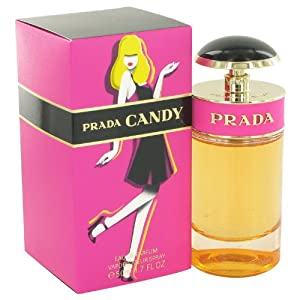

In [47]:
from IPython import display
display.Image(meta_data_df.loc[192]["imUrl"])
#display.Image(meta_data_df_cleaned.loc[259179]["imUrl"])

In [48]:
meta_data_df.price.describe()

count    189930.000000
mean         24.878165
std          33.431190
min           0.010000
25%           8.240000
50%          15.690000
75%          29.300000
max         999.990000
Name: price, dtype: float64

In [50]:
meta_data_df[meta_data_df['price'] == 999.99]

,asin,description,title,imUrl,salesRank,categories,price,related,brand
197364,B009PQIAL6,This beautifully sculpted and gracefully desig...,&quot;Vernet&quot; Black Dual Dryer Chair With...,http://ecx.images-amazon.com/images/I/41ks5sFA...,{'Beauty': 582815},"[[Beauty, Tools & Accessories, Nail Tools, Nai...",999.99,"{'also_viewed': ['B004O4N4OW', 'B009ZHVQYI', '...",NaN


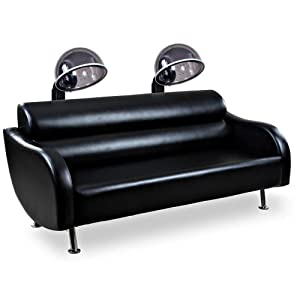

In [51]:
display.Image(meta_data_df.loc[197364]["imUrl"])

In [52]:
meta_data_df

,asin,description,title,imUrl,salesRank,categories,price,related,brand
0,0205616461,"As we age, our once youthful, healthy skin suc...",Bio-Active Anti-Aging Serum (Firming Ultra-Hyd...,http://ecx.images-amazon.com/images/I/41DecrGO...,{'Health & Personal Care': 461765},"[[Beauty, Skin Care, Face, Creams & Moisturize...",NaN,NaN,NaN
1,0558925278,Mineral Powder Brush--Apply powder or mineral ...,Eco Friendly Ecotools Quality Natural Bamboo C...,http://ecx.images-amazon.com/images/I/51L%2BzY...,{'Beauty': 402875},"[[Beauty, Tools & Accessories, Makeup Brushes ...",NaN,NaN,NaN
2,0733001998,"From the Greek island of Chios, this Mastiha b...",Mastiha Body Lotion,http://ecx.images-amazon.com/images/I/311WK5y1...,{'Beauty': 540255},"[[Beauty, Skin Care, Body, Moisturizers, Lotio...",NaN,NaN,NaN
3,0737104473,Limited edition Hello Kitty Lipstick featuring...,Hello Kitty Lustre Lipstick (See sellers comme...,http://ecx.images-amazon.com/images/I/31u6Hrzk...,{'Beauty': 931125},"[[Beauty, Makeup, Lips, Lipstick]]",NaN,NaN,NaN
4,0762451459,"The mermaid is an elusive (okay, mythical) cre...",Stephanie Johnson Mermaid Round Snap Mirror,http://ecx.images-amazon.com/images/I/41y2%2BF...,NaN,"[[Beauty, Tools & Accessories, Mirrors, Makeup...",19.98,NaN,NaN
...,...,...,...,...,...,...,...,...,...
259199,B00LP2YB8E,Color: White\nFullness72 inches\nCenter Gather...,2t 2t Edge Crystal Rhinestones Bridal Wedding ...,http://ecx.images-amazon.com/images/I/41E630m-...,NaN,"[[Beauty, Hair Care, Styling Tools, Styling Ac...",NaN,NaN,NaN
259200,B00LOS7MEE,"The secret to long lasting colors, healthy nai...",French Manicure Gel Nail Polish Set - &quot;Se...,http://ecx.images-amazon.com/images/I/41skHL1O...,{'Beauty': 108820},"[[Beauty, Makeup, Nails, Nail Polish]]",NaN,"{'also_viewed': ['B0057JCYYE', 'B00LMXHR1Y', '...",NaN
259201,B00LPVG6V0,ResQ Organics Face & Body Wash - With Aloe Ver...,ResQ Organics Face &amp; Body Wash - Aloe Vera...,http://ecx.images-amazon.com/images/I/31C1w4Ku...,NaN,"[[Beauty, Skin Care, Face, Creams & Moisturize...",NaN,NaN,NaN
259202,B00LTDUHJQ,Color: White\n2 Tier \nFullness 72 inches\nSew...,2 Tier Tulle Elbow Wedding Veil with Ribbon Ed...,http://ecx.images-amazon.com/images/I/51%2B%2B...,NaN,"[[Beauty, Hair Care, Styling Tools, Styling Ac...",NaN,NaN,NaN


In [53]:
meta_data_df.isna().sum()

asin                0
description     24707
title             444
imUrl              88
salesRank        5188
categories          0
price           69274
related         51350
brand          131038
dtype: int64

In [55]:
#dropping brand due to large # of nulls

In [54]:
meta_data_df.drop(columns=['brand'], inplace=True)

## Setting Up Surprise

In [58]:
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(surprise_df, reader)

trainset, testset = train_test_split(surprise_data, test_size=0.2, random_state=23)

In [59]:
surprise_data

In [ ]:
# How many users and items are in the trainset
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items, '\n')

In [ ]:
print('Type trainset :',type(trainset),'\n')
print('Type testset :',type(testset))

## Dummy Model

In [ ]:
baseline = NormalPredictor()
baseline.fit(trainset)

In [ ]:
predictions = baseline.test(testset)

In [ ]:
baseline = accuracy.rmse(predictions)

In [ ]:
#baseline RMSE of 1.5002

## Baseline Models

In [ ]:
baseline2 = BaselineOnly()
baseline2.fit(trainset)

In [ ]:
predictions2 = baseline2.test(testset)

In [ ]:
baseline2 = accuracy.rmse(predictions2)

In [ ]:
#baseline RMSE of 1.089 utilizing BaselineOnly

In [ ]:
als_options = {'method': 'als',
               }
als_baseline = BaselineOnly(bsl_options=als_options)

In [ ]:
als_baseline.fit(trainset)

In [ ]:
predictions = als_baseline.test(testset)

In [ ]:
als_baseline = accuracy.rmse(predictions)

In [ ]:
sgd_options = {'method': 'sgd',
               }
sgd_baseline = BaselineOnly(bsl_options=sgd_options)

In [ ]:
sgd_baseline.fit(trainset)

In [ ]:
predictions = sgd_baseline.test(testset)

In [ ]:
sgd_baseline = accuracy.rmse(predictions)

In [ ]:
#our baseline model with sgd improved our RMSE to 1.0818

## Iterating Over All Algorithms to Assess Which Models to Further Explore

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, surprise_data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

In [ ]:
#given our results, we will further explor SVDpp and SVD

## SVD Model Exploration

In [ ]:
#Running an SVD model with defaults on trainset

In [ ]:
svd = SVD(random_state=42)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

In [ ]:
#Checking to see estimated rating for 2 user/product combinations

In [ ]:
svd.predict('A1YJEY40YUW4SE', 'B00LLPT4HI')

In [ ]:
svd.predict('A2BLFCOPSMBOZ9', '7806397051')

In [ ]:
#Cross validate the model

In [ ]:
cv_svd_baseline = cross_validate(svd, surprise_data)

In [ ]:
cv_svd_baseline

### Attempt on new split

In [ ]:
#Hold out 10% of data for validation
#Create a new surpise data class
svd_data = Dataset.load_from_df(surprise_df, reader)
raw_ratings_svd = svd_data.raw_ratings
# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings_svd))
A_raw_ratings_svd = raw_ratings_svd[:threshold]
B_raw_ratings_svd = raw_ratings_svd[threshold:]

In [ ]:
# svd_data is now the set A
svd_data.raw_ratings = A_raw_ratings_svd

In [ ]:
#Create a param grid for grid search
SVD_parm_grid = {'n_factors':[20,50,100,150],'n_epochs':[10,20,30],'biased':[True,False]}

In [ ]:
#Instantiate our grid search & fit to set A
#svd_grid_search = GridSearchCV(algo_class=SVD,param_grid=SVD_parm_grid,measures=['rmse'],cv=5)
#svd_grid_search.fit(svd_data)

In [ ]:
#best_svd_algo = svd_grid_search.best_estimator['rmse']

In [ ]:
#svd_grid_search.best_params

In [ ]:
#{'rmse': {'n_factors': 20, 'n_epochs': 20, 'biased': True}}

In [ ]:
# retrain on the whole set A
trainset_svd = svd_data.build_full_trainset()
best_svd_algo.fit(trainset_svd)

In [ ]:
predictions = best_svd_algo.test(trainset_svd.build_testset())
print('Biased accuracy on A,', end='   ')
accuracy.rmse(predictions)

In [ ]:
# Compute unbiased accuracy on B
testset_svd = svd_data.construct_testset(B_raw_ratings_svd)  # testset is now the set B
predictions = best_svd_algo.test(testset_svd)
print('Unbiased accuracy on B,', end=' ')
accuracy.rmse(predictions)

In [ ]:
svd2 = SVD(n_factors=20, n_epochs=20, biased=True, random_state=42)
svd2.fit(trainset)
predictions = svd2.test(testset)
print(accuracy.rmse(predictions))

### Attempt new grid search params with lower n_factors

In [ ]:
#SVD_parm_grid = {'n_factors':[2,5,10,20],'n_epochs':[10,20,30],'biased':[True,False]}

In [ ]:
#Instantiate our grid search & fit to set A
#svd_grid_search = GridSearchCV(algo_class=SVD,param_grid=SVD_parm_grid,measures=['rmse'],cv=5)
#svd_grid_search.fit(svd_data)

In [ ]:
#best_svd_algo = svd_grid_search.best_estimator['rmse']

In [ ]:
#svd_grid_search.best_params

In [ ]:
#{'rmse': {'n_factors': 2, 'n_epochs': 20, 'biased': True}}

In [ ]:
# retrain on the whole set A
trainset_svd = svd_data.build_full_trainset()
best_svd_algo.fit(trainset_svd)

In [ ]:
predictions = best_svd_algo.test(trainset_svd.build_testset())
print('Biased accuracy on A,', end='   ')
accuracy.rmse(predictions)

In [ ]:
# Compute unbiased accuracy on B
testset_svd = svd_data.construct_testset(B_raw_ratings_svd)  # testset is now the set B
predictions = best_svd_algo.test(testset_svd)
print('Unbiased accuracy on B,', end=' ')
accuracy.rmse(predictions)

In [ ]:
svd3 = SVD(n_factors=2, n_epochs=20, biased=True, random_state=42)
svd3.fit(trainset)
predictions = svd3.test(testset)
print(accuracy.rmse(predictions))

In [ ]:
#Same RMSE as sgd_baseline

In [ ]:
cv_svd3 = cross_validate(svd3, surprise_data)

In [ ]:
cv_svd3

## SVPpp Model Exploration

In [ ]:
#Running an SVDpp model with defaults on train 

In [ ]:
svdpp = SVDpp(random_state=42)
svdpp.fit(trainset)
predictions = svdpp.test(testset)
print(accuracy.rmse(predictions))

In [ ]:
cv_svdpp_baseline = cross_validate(svdpp, surprise_data)

In [ ]:
cv_svdpp_baseline

In [ ]:
# grid search for SVD++
svdpp_param_grid = {'n_factors':[10, 20],
                    'n_epochs':[20, 30],
                    'reg_all':[0.02, 0.05], 
                    "lr_all": [0.007, 0.005]}
#svdpp_gs_model = GridSearchCV(SVDpp, param_grid=svdpp_param_grid, cv=3, joblib_verbose=10, n_jobs=-1, return_train_measures=True)

# Fit and return the best_params based on cross validation this will take a VERY long time to run
#svdpp_gs_model.fit(surprise_data)
#svdpp_gs_model.best_params['rmse']

In [ ]:
#{'n_factors': 10, 'n_epochs': 20, 'reg_all': 0.05, 'lr_all': 0.005}

In [107]:
# Instantiate - fit on trainset - score the model on testset
SVDpp_model = SVDpp(n_factors=10, n_epochs=20, random_state=42, reg_all=0.05, lr_all=.005)
SVDpp_model.fit(trainset)
predictions = SVDpp_model.test(testset)
SVDpp_gs = accuracy.rmse(predictions)

RMSE: 1.0823


In [108]:
#RMSE: 1.0823

In [ ]:
# New dictionary for SVD++
svdpp_param_grid = {'n_factors':[15, 20, 25],
                    'n_epochs':[10, 20 ],
                    'reg_all':[0.02, 0.05, .07], 
                    "lr_all": [0.007, 0.005, .002]}
#svdpp_gs_model = GridSearchCV(SVDpp, param_grid=svdpp_param_grid, cv=3, joblib_verbose=10, n_jobs=-1, return_train_measures=True)

# Fit and return the best_params based on cross validation this will take a VERY long time to run
#svdpp_gs_model.fit(surprise_data)
#svdpp_gs_model.best_params['rmse']

In [ ]:
#{'n_factors': 15, 'n_epochs': 20, 'reg_all': 0.07, 'lr_all': 0.005}

In [ ]:
# Instantiate - fit on trainset - score the model on testset
SVDpp_model = SVDpp(n_factors=15, n_epochs=20, random_state=42, reg_all=0.07, lr_all=.005)
SVDpp_model.fit(trainset)
predictions = SVDpp_model.test(testset)
SVDpp_gs = accuracy.rmse(predictions)

In [ ]:
#RMSE: 1.0824
#still not as good as sgd baseline

In [ ]:
df

## Utilizing Best Model to create Recommendations

In [95]:
##build full train set  for final model; utilize surprise_data

In [96]:
# https://surprise.readthedocs.io/en/stable/dataset.html 

In [97]:
# refit model

In [98]:
surprise_data

In [100]:
trainset

In [60]:
best_model = SVD(n_factors=2, n_epochs=20, biased=True, random_state=23)
best_model.fit(trainset)

In [62]:
## Subset data frame to show reviewers the products they have rated 
df_prior_ratings = pd.DataFrame(df.set_index("reviewerID"))
df_prior_ratings.drop(columns= ["reviewerName", "helpful", "reviewText", "overall", "summary", "unixReviewTime", "reviewTime"], inplace=True)
df_prior_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198502 entries, A1YJEY40YUW4SE to A3UJRNI8UR4871
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   asin    198502 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB


In [63]:
already_reviewed=list(df_prior_ratings.loc["A1PQFP6SAJ6D80", "asin"])
not_reviewed = meta_data_df.copy()
not_reviewed = not_reviewed[not_reviewed.asin.isin(already_reviewed) == False]
#not_reviewed.drop(already_reviewed, inplace=True, axis=0)
not_reviewed

,asin,description,title,imUrl,salesRank,categories,price,related
0,0205616461,"As we age, our once youthful, healthy skin suc...",Bio-Active Anti-Aging Serum (Firming Ultra-Hyd...,http://ecx.images-amazon.com/images/I/41DecrGO...,{'Health & Personal Care': 461765},"[[Beauty, Skin Care, Face, Creams & Moisturize...",NaN,NaN
1,0558925278,Mineral Powder Brush--Apply powder or mineral ...,Eco Friendly Ecotools Quality Natural Bamboo C...,http://ecx.images-amazon.com/images/I/51L%2BzY...,{'Beauty': 402875},"[[Beauty, Tools & Accessories, Makeup Brushes ...",NaN,NaN
2,0733001998,"From the Greek island of Chios, this Mastiha b...",Mastiha Body Lotion,http://ecx.images-amazon.com/images/I/311WK5y1...,{'Beauty': 540255},"[[Beauty, Skin Care, Body, Moisturizers, Lotio...",NaN,NaN
3,0737104473,Limited edition Hello Kitty Lipstick featuring...,Hello Kitty Lustre Lipstick (See sellers comme...,http://ecx.images-amazon.com/images/I/31u6Hrzk...,{'Beauty': 931125},"[[Beauty, Makeup, Lips, Lipstick]]",NaN,NaN
4,0762451459,"The mermaid is an elusive (okay, mythical) cre...",Stephanie Johnson Mermaid Round Snap Mirror,http://ecx.images-amazon.com/images/I/41y2%2BF...,NaN,"[[Beauty, Tools & Accessories, Mirrors, Makeup...",19.98,NaN
...,...,...,...,...,...,...,...,...
259199,B00LP2YB8E,Color: White\nFullness72 inches\nCenter Gather...,2t 2t Edge Crystal Rhinestones Bridal Wedding ...,http://ecx.images-amazon.com/images/I/41E630m-...,NaN,"[[Beauty, Hair Care, Styling Tools, Styling Ac...",NaN,NaN
259200,B00LOS7MEE,"The secret to long lasting colors, healthy nai...",French Manicure Gel Nail Polish Set - &quot;Se...,http://ecx.images-amazon.com/images/I/41skHL1O...,{'Beauty': 108820},"[[Beauty, Makeup, Nails, Nail Polish]]",NaN,"{'also_viewed': ['B0057JCYYE', 'B00LMXHR1Y', '..."
259201,B00LPVG6V0,ResQ Organics Face & Body Wash - With Aloe Ver...,ResQ Organics Face &amp; Body Wash - Aloe Vera...,http://ecx.images-amazon.com/images/I/31C1w4Ku...,NaN,"[[Beauty, Skin Care, Face, Creams & Moisturize...",NaN,NaN
259202,B00LTDUHJQ,Color: White\n2 Tier \nFullness 72 inches\nSew...,2 Tier Tulle Elbow Wedding Veil with Ribbon Ed...,http://ecx.images-amazon.com/images/I/51%2B%2B...,NaN,"[[Beauty, Hair Care, Styling Tools, Styling Ac...",NaN,NaN


In [64]:
#Function 

def buyer_recommended_products(): 
    
    buyer = input("reviewerID: ")
    n_recs = int(input("How many recommendations? "))
    
    already_reviewed = list(df_prior_ratings.loc[buyer, "asin"])
    not_reviewed = meta_data_df.copy()
    not_reviewed = not_reviewed[not_reviewed.asin.isin(already_reviewed) == False]
    #not_reviewed.drop(already_reviewed, inplace=True)
    not_reviewed.reset_index(inplace=True)
    not_reviewed["predicted_rating"] = not_reviewed["asin"].apply(lambda x: best_model.predict(buyer, x).est)
    not_reviewed.sort_values(by="predicted_rating", ascending=False, inplace=True)
    return not_reviewed.head(n_recs)

In [ ]:
buyer_recommended_products()

In [65]:
meta_data_df.head()

,asin,description,title,imUrl,salesRank,categories,price,related
0,0205616461,"As we age, our once youthful, healthy skin suc...",Bio-Active Anti-Aging Serum (Firming Ultra-Hyd...,http://ecx.images-amazon.com/images/I/41DecrGO...,{'Health & Personal Care': 461765},"[[Beauty, Skin Care, Face, Creams & Moisturize...",NaN,NaN
1,0558925278,Mineral Powder Brush--Apply powder or mineral ...,Eco Friendly Ecotools Quality Natural Bamboo C...,http://ecx.images-amazon.com/images/I/51L%2BzY...,{'Beauty': 402875},"[[Beauty, Tools & Accessories, Makeup Brushes ...",NaN,NaN
2,0733001998,"From the Greek island of Chios, this Mastiha b...",Mastiha Body Lotion,http://ecx.images-amazon.com/images/I/311WK5y1...,{'Beauty': 540255},"[[Beauty, Skin Care, Body, Moisturizers, Lotio...",NaN,NaN
3,0737104473,Limited edition Hello Kitty Lipstick featuring...,Hello Kitty Lustre Lipstick (See sellers comme...,http://ecx.images-amazon.com/images/I/31u6Hrzk...,{'Beauty': 931125},"[[Beauty, Makeup, Lips, Lipstick]]",NaN,NaN
4,0762451459,"The mermaid is an elusive (okay, mythical) cre...",Stephanie Johnson Mermaid Round Snap Mirror,http://ecx.images-amazon.com/images/I/41y2%2BF...,NaN,"[[Beauty, Tools & Accessories, Mirrors, Makeup...",19.98,NaN


In [ ]:
display.Image(meta_data_df.loc[197364]["imUrl"])

In [87]:
def buyer_recommended_products(): 
    
    buyer = input("reviewerID: ")
    n_recs = int(input("How many recommendations? "))
    
    already_reviewed = list(df_prior_ratings.loc[buyer, "asin"])
    not_reviewed = meta_data_df.copy()
    not_reviewed = not_reviewed[not_reviewed.asin.isin(already_reviewed) == False]
    #not_reviewed.drop(already_reviewed, inplace=True)
    not_reviewed.reset_index(inplace=True)
    not_reviewed["predicted_rating"] = not_reviewed["asin"].apply(lambda x: best_model.predict(buyer, x).est)
    not_reviewed.sort_values(by="predicted_rating", ascending=False, inplace=True)
    return not_reviewed[['title', 'description', 'imUrl']].head(n_recs)

In [105]:
#could save the return as a variable, then return variable AND utilize variable
#to index into image and loop through (for loop in function)
#loop through subsetted df and return image

In [88]:
buyer_recommended_products()

reviewerID: A184I8GT3BHZQV
How many recommendations? 3


,title,description,imUrl
54683,China Glaze Polish Fairy Dust 70563/551 Discon...,"Highlights:For two-handle kitchen, tub and lav...",http://ecx.images-amazon.com/images/I/41cXQNa9...
114810,Sigma F82 - Round Kabuki TM,Unique Feature: Dense and rounded head\nFuncti...,http://ecx.images-amazon.com/images/I/3178N02L...
131407,real Techniques Powder Brush,Designed with pro makeup artist Samantha Chapm...,http://ecx.images-amazon.com/images/I/31KkPQeb...


In [103]:
meta_data_df.categories #which level do we want to go to? 

0         [[Beauty, Skin Care, Face, Creams & Moisturize...
1         [[Beauty, Tools & Accessories, Makeup Brushes ...
2         [[Beauty, Skin Care, Body, Moisturizers, Lotio...
3                        [[Beauty, Makeup, Lips, Lipstick]]
4         [[Beauty, Tools & Accessories, Mirrors, Makeup...
                                ...                        
259199    [[Beauty, Hair Care, Styling Tools, Styling Ac...
259200               [[Beauty, Makeup, Nails, Nail Polish]]
259201    [[Beauty, Skin Care, Face, Creams & Moisturize...
259202    [[Beauty, Hair Care, Styling Tools, Styling Ac...
259203    [[Beauty, Tools & Accessories, Bags & Cases, T...
Name: categories, Length: 259204, dtype: object

In [109]:
#visualizations: demonstrate function, screen record of running the function
#select user, this is what they have previously rated, here's our returned 
#recommended items 

In [111]:
#report RMSE, discuss in terms of rating scale of 1-5

In [112]:
#in presentation report system is based off of x # users, x # reviews, x # of products in reviews

In [113]:
#5 core limitation; system needs user interaction to work, need users to review at least 5 products
#and products to have at least 5 reviews